In [1]:
using CairoMakie
using DataFrames
using FITSIO
using LaTeXStrings
using Printf
using Statistics

In [2]:
kic = 5111939

5111939

In [19]:
function plot_lightcurve(kic; qtrs = 1:17, rescale_lc = true)
    if rescale_lc
        ylab = "Relative flux"
    else
        ylab = L"f / \mathrm{e}^{-} \, \mathrm{s}^{-1}"
    end

    fig = Figure(size=(1600,400))
    a = Axis(fig[1, 1], title="KIC $(kic)", xlabel=L"t / \mathrm{d}", ylabel=ylab)

    for q in qtrs
        fitsdir = joinpath(@__DIR__, "..", "lc-files", "HLSP", @sprintf("Q%02d", q), "detrended_chi2_threshold")
        file = joinpath(fitsdir, @sprintf("hlsp_iris_kepler_kepler_kplr%09d-q%02d_kepler_v1.0_lc_detrended.fits", kic, q))

        try
            # nc = FITS(file, "r")[1][:NCBV]
            # println("Quarter $q: $nc CBVs")
            f = FITS(file, "r")

            nc = read_header(f[1])["NCBV"]
            println("Quarter $q: $nc CBVs")

            lc = DataFrame(f[2])

            if rescale_lc
                flux_mean = mean(lc[!, :FLUX_DETREND])
                flux = lc[!, :FLUX_DETREND] ./ flux_mean
                flux_err = lc[!, :FLUX_DETREND_ERR_EST] ./ flux_mean
            else
                flux = lc[!, :FLUX_DETREND]
                flux_err = lc[!, :FLUX_DETREND_ERR_EST]
            end

        
            errorbars!(a, lc[!, :TIME], flux, flux_err)
        catch e
            @warn "Failed to read file" file
            continue
        end
    end    

    fig
end

plot_lightcurve (generic function with 1 method)

Quarter 1: 9 CBVs
Quarter 2: 19 CBVs
Quarter 3: 20 CBVs
Quarter 4: 19 CBVs
Quarter 5: 24 CBVs
Quarter 7: 15 CBVs
Quarter 8: 12 CBVs


┌ Warning: Failed to read file
│   file = /mnt/home/wfarr/KeplerDetrend/notebooks/../lc-files/HLSP/Q06/detrended_chi2_threshold/hlsp_iris_kepler_kepler_kplr005111939-q06_kepler_v1.0_lc_detrended.fits
└ @ Main /mnt/home/wfarr/KeplerDetrend/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:37


Quarter 9: 17 CBVs
Quarter 11: 15 CBVs
Quarter 12: 14 CBVs
Quarter 13: 17 CBVs


┌ Warning: Failed to read file
│   file = /mnt/home/wfarr/KeplerDetrend/notebooks/../lc-files/HLSP/Q10/detrended_chi2_threshold/hlsp_iris_kepler_kepler_kplr005111939-q10_kepler_v1.0_lc_detrended.fits
└ @ Main /mnt/home/wfarr/KeplerDetrend/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:37
┌ Warning: Failed to read file
│   file = /mnt/home/wfarr/KeplerDetrend/notebooks/../lc-files/HLSP/Q14/detrended_chi2_threshold/hlsp_iris_kepler_kepler_kplr005111939-q14_kepler_v1.0_lc_detrended.fits
└ @ Main /mnt/home/wfarr/KeplerDetrend/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sdnNjb2RlLXJlbW90ZQ==.jl:37


Quarter 15: 14 CBVs
Quarter 16: 15 CBVs
Quarter 17: 7 CBVs


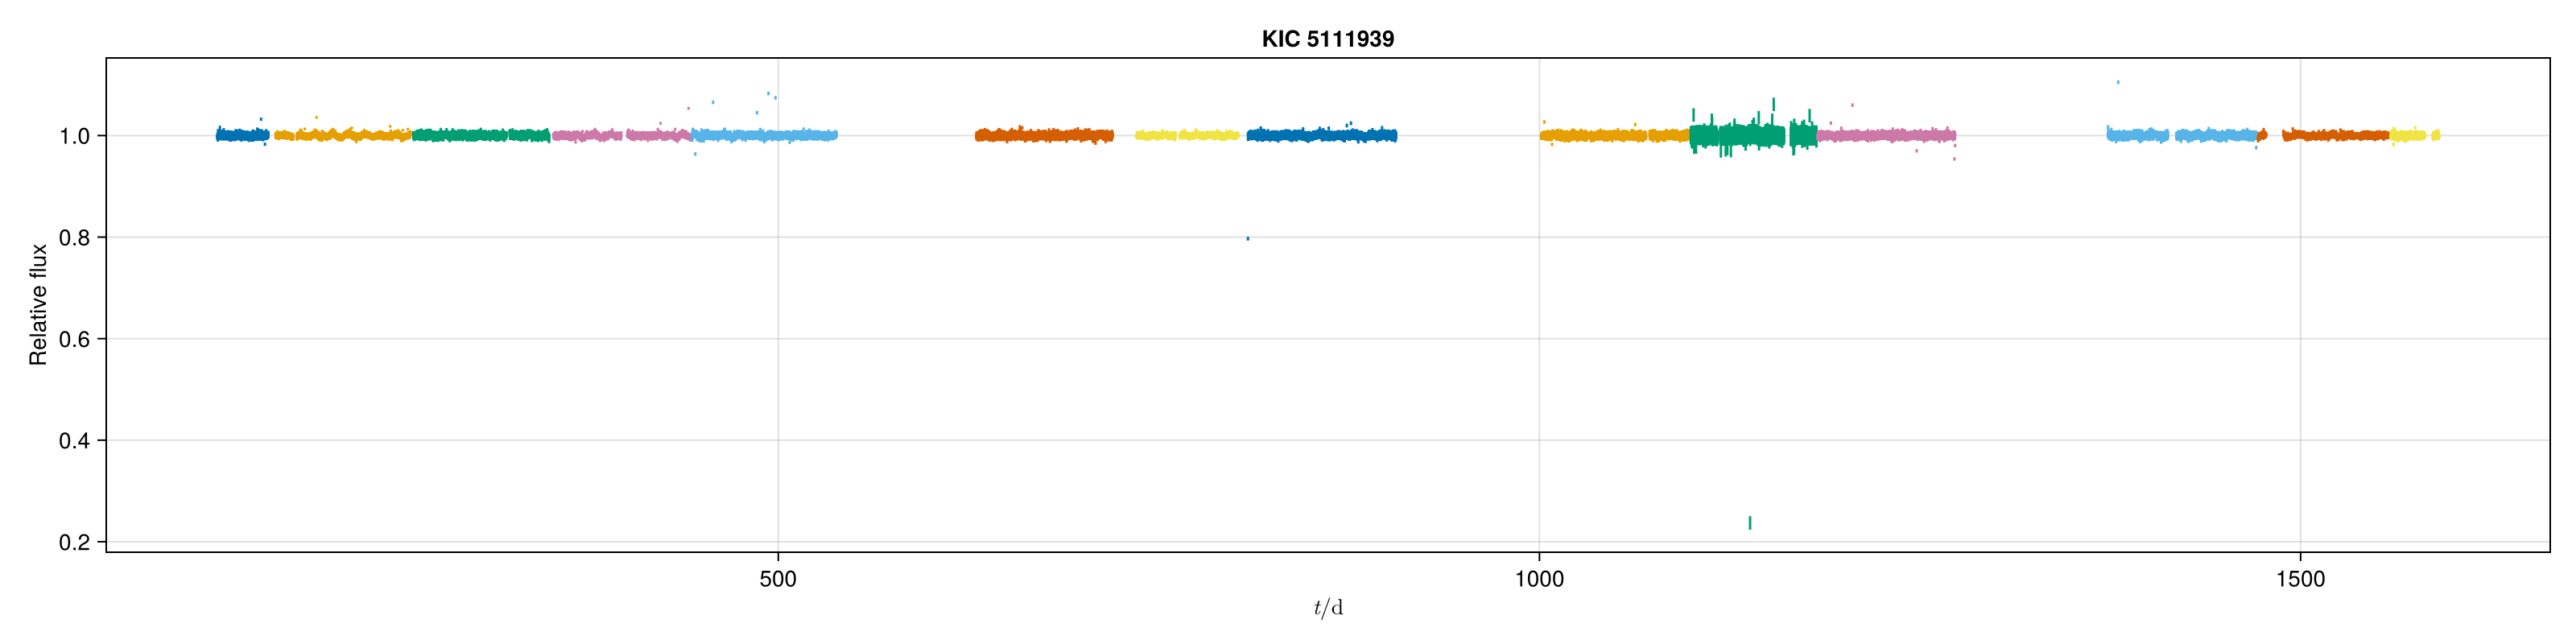

In [20]:
plot_lightcurve(kic)